# 선형회귀 개요

선형 회귀(線型回歸, Linear regression)는 종속 변수 y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

## 선형회귀 모델
$$
\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b
$$


- $\hat{y_i}$: 예측값
- $x$: 특성(feature-컬럼)
- $w$: 가중치(weight), 회귀계수(regression coefficient). 특성이 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
- $b$: 절편
- $p$: p 번째 특성(feature)/p번째 가중치
- $i$: i번째 관측치(sample)


## 손실(loss)함수/오차(error)함수/비용(cost)함수/목적(objective)함수

- 모델이 출력한 예측값과 실제 값 사이의 차이를 계산하는 함수
- 평가 지표로 사용되기도 하고 모델을 최적화하는데 사용된다.

## 최적화(Optimize)

- 손실함수의 값이 최소화 되도록 모델을 학습하는 과정.
- 최적화의 두가지 방법
    - 정규방정식
    - 경사하강법

### Boston DataSet
 - CRIM	: 지역별 범죄 발생률
 - ZN	: 25,000 평방피트를 초과하는 거주지역의 비율
 - INDUS: 비상업지역 토지의 비율
 - CHAS	: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
 - NOX	: 일산화질소 농도
 - RM	: 주택 1가구당 평균 방의 개수
 - AGE	: 1940년 이전에 건축된 소유주택의 비율
 - DIS	: 5개의 보스턴 고용센터까지의 접근성 지수
 - RAD	: 고속도로까지의 접근성 지수
 - TAX	: 10,000 달러 당 재산세율
 - PTRATIO : 지역별 교사 한명당 학생 비율
 - B	: 지역의 흑인 거주 비율
 - LSTAT: 하위계층의 비율(%)
 
 - MEDV	: Target.  본인 소유의 주택가격(중앙값) (단위: $1,000)


In [50]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [51]:
X, y = data['data'], data['target']
df = pd.DataFrame(X, columns=data['feature_names'])
df['MEDV'] = y

In [52]:
df.shape

(506, 14)

In [53]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [54]:
df['CHAS'].value_counts() #범주형

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## LinearRegression
- 가장 기본적인 선형 회귀 모델
- Feature 전처리
    - 범주형(CHAS): One hot encoding
    - 연속형(나머지): Feature Scaling 한다. (StandardScaler를 사용하는 경우 성능이 더 잘나오는 경향이 있다.)

In [56]:
chas_df = pd.get_dummies(df['CHAS'])
chas_df.columns = ['CHAS_0', 'CHAS_1']
chas_df.head()

,CHAS_0,CHAS_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [57]:
df2 = df.join(chas_df) #CHAS 원핫인코딩 컬럼을 DF에 추가
df2.drop(columns='CHAS', inplace=True) #CHAS컬럼 제거
df2.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,0


In [58]:
y = df2['MEDV']
X = df2.drop(columns='MEDV')

In [59]:
# TRAIN/TEST SET으로 분리
# 연속형 컬럼 Scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

((379, 14), (127, 14))

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS_0', 'CHAS_1'],
      dtype='object')

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#평가지표 출력함수
def print_regression_metrics(y, pred, title=None):
    mse = mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, pred)
    if title:
        print(title)
    print(f"MSE: {mse}, RMSE: {rmse}, R2: {r2}")
    print("-"*100)

In [63]:
from util import print_metrics, print_regression_metrics

In [64]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train) #각 Feature에 곱할 weight(가중치), bias(편향)을 찾는다.

LinearRegression()

In [65]:
# 편향(절편, bias)
lr.intercept_

22.608707124010557

In [66]:
# 가중치(WEIGHT)
lr.coef_

array([-0.97100092,  1.04667838, -0.04044753, -1.80876877,  2.60991991,
       -0.19823317, -3.00216551,  2.08021582, -1.93289037, -2.15743759,
        0.75199122, -3.59027047, -0.29704388,  0.29704388])

In [67]:
pd.Series(lr.coef_, index=X_train.columns)

CRIM      -0.971001
ZN         1.046678
INDUS     -0.040448
NOX       -1.808769
RM         2.609920
AGE       -0.198233
DIS       -3.002166
RAD        2.080216
TAX       -1.932890
PTRATIO   -2.157438
B          0.751991
LSTAT     -3.590270
CHAS_0    -0.297044
CHAS_1     0.297044
dtype: float64

In [68]:
# 모델 평가
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

print_regression_metrics(y_train, pred_train, title='Train')
print_regression_metrics(y_test, pred_test, title='Test')

Train
MSE: 19.640519427908046, RMSE: 4.4317625644779355, R2: 0.7697699488741149
----------------------------------------------------------------------------------------------------
Test
MSE: 29.782245092302407, RMSE: 5.457311159564059, R2: 0.6354638433202124
----------------------------------------------------------------------------------------------------


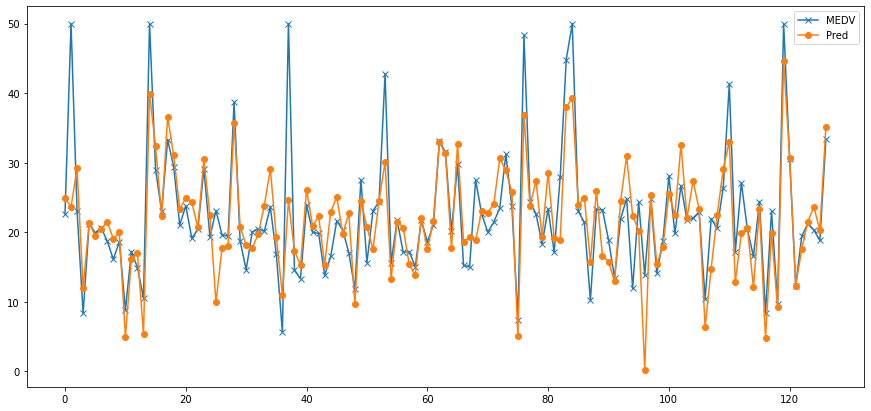

In [69]:
# 실제값(MEDV)과 예측값 을 plotting 
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.plot(range(len(y_test)), y_test, label='MEDV', marker='x')
plt.plot(range(len(y_test)), pred_test, label='Pred', marker='o')
plt.legend()
plt.show()

# 다항회귀 (Polynomial Regression)
- 단순한 직선형 보다는 복잡한 비선형 형태의 데이터를 추론하기 위한 모델
- Feature들을 거듭제곱한 Feature들을 추가하여 모델링한다.
- PolynomialFeatures 변환기를 이용

In [70]:
np.random.seed(0)
m = 100 #데이터개수
X = 6*np.random.rand(m, 1) - 3
y = X**2 + X + 2 + np.random.normal(0,1, size=(m,1))
y = y.flatten()

In [71]:
df = pd.DataFrame({"X":X.flatten(), "Y":y})
df.head()

,X,Y
0,0.292881,1.213510
1,1.291136,5.858995
2,0.616580,3.462414
3,0.269299,0.805577
4,-0.458071,3.240010


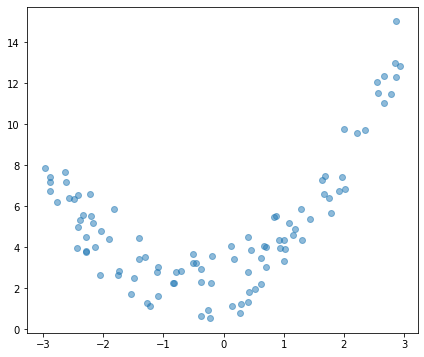

In [72]:
plt.figure(figsize=(7,6))
plt.scatter(X, y, alpha=0.5)
plt.show()

In [73]:
lr = LinearRegression()
lr.fit(X, y)
lr.coef_, lr.intercept_
#  0.781 * X + 5.1756 = pred

(array([0.78189543]), 5.175619278567209)

In [74]:
# 평가
pred = lr.predict(X)
print_regression_metrics(y, pred)

MSE: 7.729204760808937, RMSE: 2.7801447373848966, R2: 0.19138252437306003
----------------------------------------------------------------------------------------------------


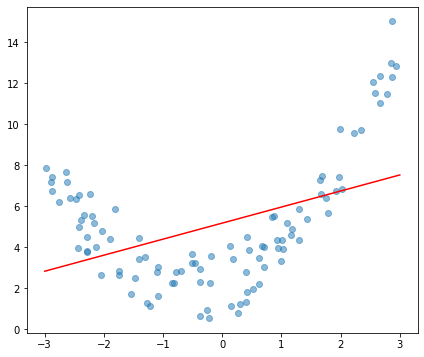

In [75]:
X_new = np.linspace(-3, 3, 100).reshape(-1,1)
y_new = lr.predict(X_new)

plt.figure(figsize=(7,6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X_new, y_new, color='red')
plt.show()

In [76]:
# X의 Feature를 늘려서 다항식이 되도록 처리 (2차함수) => PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

pnf = PolynomialFeatures(degree=2, #degree: 최고차항 지정
                         include_bias=False) # 상수항을 추가 (모든값 1인 Feature추가)
X_poly = pnf.fit_transform(X)

In [77]:
X.shape, X_poly.shape

((100, 1), (100, 2))

In [78]:
X[:2]

array([[0.29288102],
       [1.2911362 ]])

In [79]:
pnf.get_feature_names()

['x0', 'x0^2']

In [80]:
lr2 = LinearRegression()
lr2.fit(X_poly, y)

LinearRegression()

In [81]:
lr2.coef_, lr2.intercept_

(array([0.97906552, 0.94978823]), 2.340500756262887)

In [82]:
X**2 + X + 2

array([[ 2.37866032],
       [ 4.95816888],
       [ 2.99675147],
       [ 2.3418211 ],
       [ 1.75175802],
       [ 3.641628  ],
       [ 1.76575609],
       [ 9.87613703],
       [12.52137016],
       [ 1.78974078],
       [ 6.81407615],
       [ 2.20342651],
       [ 2.57494961],
       [11.07434978],
       [ 6.05057863],
       [ 5.65941554],
       [ 7.40816429],
       [ 7.97861369],
       [ 6.45430292],
       [ 9.14879652],
       [13.11842868],
       [ 7.01680186],
       [ 1.8222944 ],
       [ 6.51625333],
       [ 4.95536546],
       [ 3.54433025],
       [ 4.43920732],
       [11.78630955],
       [ 2.1482745 ],
       [ 1.75014468],
       [ 2.58295983],
       [ 6.35275033],
       [ 1.80612255],
       [ 2.57919909],
       [ 7.44901602],
       [ 3.20398495],
       [ 3.12493057],
       [ 3.19385213],
       [11.75133333],
       [ 4.28103216],
       [ 1.86761648],
       [ 1.76493082],
       [ 4.5918784 ],
       [ 6.32381172],
       [ 4.00180124],
       [ 4

In [83]:
# 그래프 확인

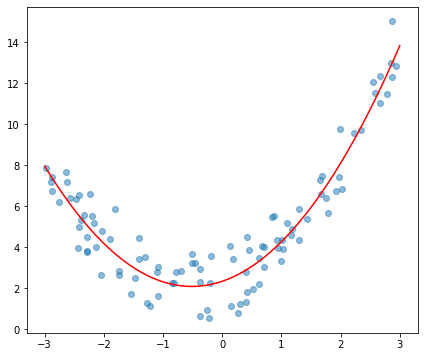

In [84]:
X_new_poly = pnf.transform(X_new)
# X_new.shape, X_new_poly.shape
y_new = lr2.predict(X_new_poly)

plt.figure(figsize=(7,6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X_new, y_new, color='red')
plt.show()

In [85]:
print_regression_metrics(y, lr.predict(X))

MSE: 7.729204760808937, RMSE: 2.7801447373848966, R2: 0.19138252437306003
----------------------------------------------------------------------------------------------------


In [86]:
#모델 평가
print_regression_metrics(y, lr2.predict(X_poly))

MSE: 0.9735576723414217, RMSE: 0.9866902616026073, R2: 0.8981478985551461
----------------------------------------------------------------------------------------------------


In [87]:
np.mean(y)

5.047985043575299

In [88]:
# input data 가 다차원인 경우(Feature수가 N개)
data = np.arange(12).reshape(4,3) #Feature: 3
data.shape

(4, 3)

In [89]:
data

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [90]:
pnf2 = PolynomialFeatures(degree=2)
data_poly = pnf2.fit_transform(data)
data_poly.shape

(4, 10)

In [91]:
pnf2.get_feature_names()

['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [92]:
pd.DataFrame(data_poly, columns=pnf2.get_feature_names())

,1,x0,x1,x2,x0^2,x0 x1,x0 x2,x1^2,x1 x2,x2^2
0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,4.0
1,1.0,3.0,4.0,5.0,9.0,12.0,15.0,16.0,20.0,25.0
2,1.0,6.0,7.0,8.0,36.0,42.0,48.0,49.0,56.0,64.0
3,1.0,9.0,10.0,11.0,81.0,90.0,99.0,100.0,110.0,121.0


In [93]:
pnf3 = PolynomialFeatures(degree=5)
data_poly2 = pnf3.fit_transform(data)
data_poly2.shape

(4, 56)

In [94]:
pnf3.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [97]:
# Degree를 크게
pnf = PolynomialFeatures(degree=100, include_bias=False)
X_train_poly_100 = pnf.fit_transform(X)
X_train_poly_100.shape, X.shape

((100, 100), (100, 1))

In [98]:
lr = LinearRegression()
lr.fit(X_train_poly_100, y)

LinearRegression()

In [100]:
lr.coef_.shape

(100,)

In [103]:
X_new = np.linspace(-3,3,100).reshape(-1, 1)
X_new_poly_100 = pnf.transform(X_new)
pred_new_100 = lr.predict(X_new_poly_100)

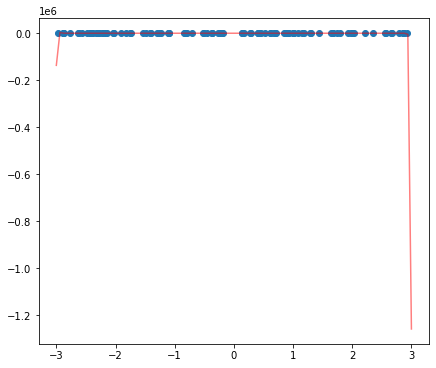

In [107]:
plt.figure(figsize=(7,6))
plt.scatter(X, y)
plt.plot(X_new, pred_new_100, color='r', alpha=0.5)
plt.show()

### PolynomialFeatures를 Boston set에 적용

In [155]:
pnf = PolynomialFeatures(degree=2, include_bias=False)
X_train_scaled_poly = pnf.fit_transform(X_train_scaled)
X_test_scaled_poly = pnf.transform(X_test_scaled)

In [156]:
X_train_scaled.shape, X_train_scaled_poly.shape

((379, 13), (379, 104))

In [93]:
pnf.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x0 x13',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x1 x13',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x2 x13',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x3 x13',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x4 x13',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x5 x13',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x6 x13',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x7 x13',
 'x8^2',
 'x8 x9',
 'x8 x10',
 'x8

In [157]:
lr3 = LinearRegression()
lr3.fit(X_train_scaled_poly, y_train)

LinearRegression()

In [158]:
pred_train3 = lr3.predict(X_train_scaled_poly)
pred_test3 = lr3.predict(X_test_scaled_poly)

In [159]:
print_regression_metrics(y_train, pred_train3, title='Train poly')
print_regression_metrics(y_test, pred_test3, title='Test poly')

Train poly
MSE: 4.090362612543778, RMSE: 2.0224644898103348, R2: 0.9520519609032729
----------------------------------------------------------------------------------------------------
Test poly
MSE: 32.06913512158057, RMSE: 5.662961691692835, R2: 0.6074721959666065
----------------------------------------------------------------------------------------------------


In [114]:
df2

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,1,0
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,1,0
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,1,0
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,1,0


In [ ]:
Train
MSE: 19.640519427908046, RMSE: 4.4317625644779355, R2: 0.7697699488741149
----------------------------------------------------------------------------------------------------
Test
MSE: 29.782245092302407, RMSE: 5.457311159564059, R2: 0.6354638433202124

## 규제 (Regularization)
- 선형 회귀 모델에서 과대적합(Overfitting) 문제를 해결하기 위해 가중치(회귀계수)에 페널티 값을 적용하는 것.
- 입력데이터의 Feature들이 너무 많은 경우 과적합이 발생.
    - Feature수에 비해 관측치 수가 적은 경우 모델이 복잡해 지면서 과적합이 발생한다.
- 해결
    - 데이터를 더 수집한다. 
    - Feature selection
        - 불필요한 Features들을 제거한다.
    - 규제 (Regularization) 을 통해 Feature들에 곱해지는 가중치가 커지지 않도록 제한한다.
    

## Ridge Regression
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Norm)을 더해준다.
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일)
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져 입력데이터의 Feature들 중 중요하지 않은 Feature의 output에 대한 영향력이 작아지게 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$

In [120]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [126]:
from sklearn.linear_model import Ridge
ridge1 = Ridge(random_state=0) #alpah=1
ridge1.fit(X_train_scaled, y_train)
pred_train1 = ridge1.predict(X_train_scaled)
pred_test1 = ridge1.predict(X_test_scaled)

In [127]:
print('alpha=1')
print_regression_metrics(y_train, pred_train1, title='Train')
print_regression_metrics(y_test, pred_test1, title="Test")

alpha=1
Train
MSE: 19.64194935381896, RMSE: 4.431923888540839, R2: 0.76975318699993
----------------------------------------------------------------------------------------------------
Test
MSE: 29.853763334547608, RMSE: 5.463859746968951, R2: 0.6345884564889054
----------------------------------------------------------------------------------------------------


In [128]:
ridge1.coef_

array([-0.96187481,  1.02775462, -0.06861144,  0.59814087, -1.77318401,
        2.6205672 , -0.20466821, -2.96504904,  2.00091047, -1.85840697,
       -2.14955893,  0.75175979, -3.57350065])

In [131]:
from sklearn.linear_model import Ridge
ridge1 = Ridge(alpha=0.01, random_state=0) #alpah=0.01
ridge1.fit(X_train_scaled, y_train)
pred_train1 = ridge1.predict(X_train_scaled)
pred_test1 = ridge1.predict(X_test_scaled)

print('alpha=0.01')
print_regression_metrics(y_train, pred_train1, title='Train')
print_regression_metrics(y_test, pred_test1, title="Test")

alpha=0.01
Train
MSE: 19.6405195795332, RMSE: 4.431762581584578, R2: 0.7697699470967347
----------------------------------------------------------------------------------------------------
Test
MSE: 29.782964300126416, RMSE: 5.457377053138845, R2: 0.6354550401807847
----------------------------------------------------------------------------------------------------


In [132]:
ridge1.coef_

array([-0.97090686,  1.04648351, -0.04074187,  0.59413006, -1.80840456,
        2.61003017, -0.19830017, -3.00178921,  2.07939188, -1.93211252,
       -2.15735709,  0.75198861, -3.59010071])

In [147]:
from sklearn.linear_model import Ridge
ridge1 = Ridge(alpha=1000, random_state=0) #alpah=100
ridge1.fit(X_train_scaled, y_train)
pred_train1 = ridge1.predict(X_train_scaled)
pred_test1 = ridge1.predict(X_test_scaled)

print('alpha=1000')
print_regression_metrics(y_train, pred_train1, title='Train')
print_regression_metrics(y_test, pred_test1, title="Test")

alpha=1000
Train
MSE: 37.6379127019148, RMSE: 6.13497454778052, R2: 0.55880094732523
----------------------------------------------------------------------------------------------------
Test
MSE: 47.385118128796044, RMSE: 6.883684923701552, R2: 0.42000380451661745
----------------------------------------------------------------------------------------------------


In [148]:
ridge1.coef_

array([-0.44267768,  0.38220219, -0.51288178,  0.3335525 , -0.37129939,
        1.25386598, -0.32729508, -0.06287806, -0.28302417, -0.47738562,
       -0.87977916,  0.4225767 , -1.16283877])

In [137]:
### GridSearchCV 이용해 최적의 alpha
from sklearn.model_selection import GridSearchCV
param = {"alpha":[0.01, 0.1, 1, 5, 10, 20, 30, 40, 100]}
ridge = Ridge(random_state=0)
gs = GridSearchCV(ridge, param, cv=4, scoring=['r2', 'neg_mean_squared_error'], refit='r2')

gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=4, estimator=Ridge(random_state=0),
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10, 20, 30, 40, 100]},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'])

In [140]:
result_df = pd.DataFrame(gs.cv_results_)
result_df.sort_values('rank_test_r2').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error
5,0.001494,0.000501,0.001000,0.000004,20,{'alpha': 20},0.769783,0.645949,0.646802,0.818040,0.720144,0.075716,1,-17.823357,-26.999550,-30.525873,-18.104060,-23.363210,5.542457,2
4,0.000997,0.000002,0.000499,0.000499,10,{'alpha': 10},0.762913,0.645798,0.650567,0.820667,0.719986,0.074670,2,-18.355176,-27.011065,-30.200460,-17.842694,-23.352349,5.376125,1
6,0.001739,0.000826,0.002248,0.001632,30,{'alpha': 30},0.773569,0.646587,0.644039,0.814082,0.719569,0.075631,3,-17.530173,-26.950941,-30.764711,-18.497835,-23.435915,5.597524,4
3,0.000748,0.000432,0.000994,0.000006,5,{'alpha': 5},0.757436,0.646131,0.653369,0.820574,0.719378,0.073163,4,-18.779233,-26.985694,-29.958289,-17.851926,-23.393786,5.196172,3
7,0.003743,0.004190,0.000990,0.000703,40,{'alpha': 40},0.775585,0.647291,0.641584,0.809645,0.718526,0.075088,5,-17.374137,-26.897195,-30.976839,-18.939336,-23.546877,5.607163,8


## Lasso(Least Absolut Shrinkage and Selection Operator) Regression

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
- Lasso 회귀의 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 자동으로 Feature Selection이 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

In [142]:
from sklearn.linear_model import Lasso

In [144]:
lasso = Lasso() #alpha=1
lasso.fit(X_train_scaled, y_train)
pred_train = lasso.predict(X_train_scaled)
pred_test = lasso.predict(X_test_scaled)

print('alpha=1')
print_regression_metrics(y_train, pred_train, "alpha=1 Train")
print_regression_metrics(y_test, pred_test, "alpha=1 Test")

alpha=1
alpha=1 Train
MSE: 25.38793844433231, RMSE: 5.038644504659196, R2: 0.702397567056503
----------------------------------------------------------------------------------------------------
alpha=1 Test
MSE: 35.48963616828034, RMSE: 5.957317866983458, R2: 0.5656050935497574
----------------------------------------------------------------------------------------------------


In [145]:
lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        2.52933025, -0.        , -0.        , -0.        , -0.22763148,
       -1.70088382,  0.13186059, -3.60565498])

In [152]:
lasso = Lasso(alpha=10, random_state=0) #alpha=10
lasso.fit(X_train_scaled, y_train)
pred_train = lasso.predict(X_train_scaled)
pred_test = lasso.predict(X_test_scaled)

print('alpha=10')
print_regression_metrics(y_train, pred_train, "alpha=10 Train")
print_regression_metrics(y_test, pred_test, "alpha=10 Test")

alpha=10
alpha=10 Train
MSE: 85.30823553163789, RMSE: 9.236245748768159, R2: 0.0
----------------------------------------------------------------------------------------------------
alpha=10 Test
MSE: 81.7904659829155, RMSE: 9.043808157126925, R2: -0.001119359203955339
----------------------------------------------------------------------------------------------------


In [153]:
lasso.intercept_

22.608707124010557

In [154]:
lasso.coef_

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.])

### Ridge, Lasso => Boston Dataset (PolynomialFeatures로 전처리한) 

In [160]:
alpha_list = [0.01, 0.1, 1, 10, 100]

In [161]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

In [164]:
lr = LinearRegression()
lr.fit(X_train_scaled_poly, y_train)

pred_train_lr = lr.predict(X_train_scaled_poly)
pred_test_lr = lr.predict(X_test_scaled_poly)

print_regression_metrics(y_train, pred_train_lr, title="LinearRegression Train")
print_regression_metrics(y_test, pred_test_lr, title="LinearRegression Test")

LinearRegression Train
MSE: 4.090362612543778, RMSE: 2.0224644898103348, R2: 0.9520519609032729
----------------------------------------------------------------------------------------------------
LinearRegression Test
MSE: 32.06913512158057, RMSE: 5.662961691692835, R2: 0.6074721959666065
----------------------------------------------------------------------------------------------------


In [165]:
# Ridge 의 alpha값 변화에 따른 R2 값을 저장할 리스트
ridge_train_metrics_list = []
ridge_test_metrics_list = []

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha, random_state=0)
    ridge.fit(X_train_scaled_poly, y_train)
    pred_train = ridge.predict(X_train_scaled_poly)
    pred_test = ridge.predict(X_test_scaled_poly)
    ridge_train_metrics_list.append(r2_score(y_train, pred_train))
    ridge_test_metrics_list.append(r2_score(y_test, pred_test))

In [166]:
ridge_result = pd.DataFrame({
    "alpha":alpha_list,
    "train":ridge_train_metrics_list,
    "test":ridge_test_metrics_list
})

In [167]:
ridge_result

,alpha,train,test
0,0.01,0.951620,0.617099
1,0.10,0.951046,0.628387
2,1.00,0.948182,0.669643
3,10.00,0.938182,0.768305
4,100.00,0.901260,0.761119


In [168]:
X_train_scaled_poly.shape

(379, 104)

In [169]:
lasso_train_metrics_list = []
lasso_test_metrics_list = []

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, random_state=0)
    lasso.fit(X_train_scaled_poly, y_train)
    pred_train = lasso.predict(X_train_scaled_poly)
    pred_test = lasso.predict(X_test_scaled_poly)
    lasso_train_metrics_list.append(r2_score(y_train, pred_train))
    lasso_test_metrics_list.append(r2_score(y_test, pred_test))

In [170]:
lasso_result = pd.DataFrame({
    "alpha":alpha_list,
    "train":lasso_train_metrics_list,
    "test":lasso_test_metrics_list
})

In [171]:
lasso_result

,alpha,train,test
0,0.01,0.944940,0.687005
1,0.10,0.910694,0.776997
2,1.00,0.802262,0.695405
3,10.00,0.008723,0.009718
4,100.00,0.000000,-0.001119


## 엘라스틱넷
- 릿지와 라쏘를 절충한 모델.
- 규제항에 릿지, 회귀 규제항을 더해서 추가한다. 
- 혼합뷰율 $r$을 사용해 혼합정도를 조절
- $r=0$이면 릿지와 같고 $r=1$이면 라쏘와 같다.

$$
\text{손실함수}(w) = \text{MSE}(w) + r\alpha \sum_{i=1}^{n}{\left| w_i \right|}  + \cfrac{1-r}{2}\alpha\sum_{i=1}^{n}{w_{i}^{2}}
$$

In [172]:
from sklearn.linear_model import ElasticNet

In [177]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5) #L1규제(Lasso) 비율: 0.4, L2규제(Ridge) 비율: 0.6
elastic.fit(X_train_scaled_poly, y_train)

pred_train = elastic.predict(X_train_scaled_poly)
pred_test = elastic.predict(X_test_scaled_poly)

In [178]:
print_regression_metrics(y_train, pred_train, title='Train')
print_regression_metrics(y_test, pred_test, title='Test')

Train
MSE: 6.975316104503311, RMSE: 2.6410823736686653, R2: 0.9182339657943528
----------------------------------------------------------------------------------------------------
Test
MSE: 17.425921064062766, RMSE: 4.174436616366664, R2: 0.7867058621131069
----------------------------------------------------------------------------------------------------


# 정리
- 일반적으로 선형회귀의 경우 어느정도 규제가 있는 경우가 성능이 좋다.
- 기본적으로 릿지를 사용한다.
- Target에 영향을 주는 Feature가 몇 개뿐일 경우 특성의 가중치를 0으로 만들어 주는 라쏘 사용한다. 
- 특성 수가 학습 샘플 수 보다 많거나 feature간에 연관성이 높을 때는 엘라스틱넷을 사용한다.